<a href="https://colab.research.google.com/github/jangidprashantjee185045/CNN-Computer_Vision/blob/project1/denoising_autencoder_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.keras.datasets import mnist

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [16]:
#adding some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

In [17]:
np.random.normal(loc=0.0, scale=1.0, size=x_train.shape).shape #60000 noise images 

(60000, 28, 28, 1)

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [18]:
x_train_noisy.min() ,x_train_noisy.max() #so we have to clip it 

(-3.0514204072069973, 3.495037217185942)

In [19]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [20]:
x_train_noisy.shape

(60000, 28, 28, 1)

In [21]:
x_train_noisy[0].min(),x_train_noisy.max()

(0.0, 1.0)

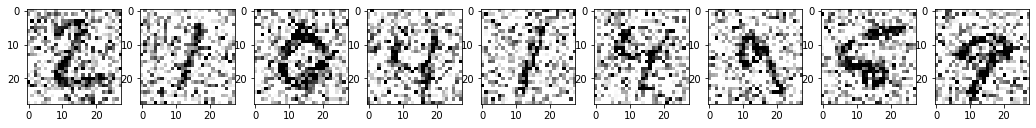

In [24]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [25]:
model = Sequential()
#encoding layers
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
#decoding layers
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics = ['accuracy'] )

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           5

In [41]:
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))

Epoch 1/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0175 - accuracy: 0.8109 - val_loss: 0.0172 - val_accuracy: 0.8095
Epoch 2/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0175 - accuracy: 0.8109 - val_loss: 0.0171 - val_accuracy: 0.8101
Epoch 3/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0175 - accuracy: 0.8109 - val_loss: 0.0172 - val_accuracy: 0.8106
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0174 - accuracy: 0.8109 - val_loss: 0.0173 - val_accuracy: 0.8108
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0174 - accuracy: 0.8109 - val_loss: 0.0172 - val_accuracy: 0.8107
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0174 - accuracy: 0.8109 - val_loss: 0.0171 - val_accuracy: 0.8099
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0174 - accuracy: 0.8109 - val_loss: 0.0171 - val_accuracy: 0.8104

In [42]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0170 - accuracy: 0.8097


[0.016950879245996475, 0.8097038269042969]

In [43]:
no_noise_img = model.predict(x_test_noisy)

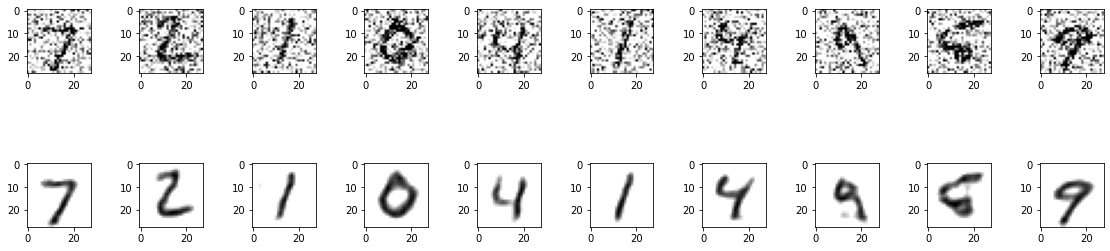

In [44]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()